# Exploring a new features 

In [1]:
import uproot4
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
import awkward1


ccup9_2015 = r'D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\4Prongs2015o.root'

events = uproot4.open(ccup9_2015)['4Prongs/events']
events.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
RunNum               | int32_t                  | AsDtype(&#39;&gt;i4&#39;)
PeriodNumber         | uint32_t                 | AsDtype(&#39;&gt;u4&#39;)
OrbitNumber          | uint32_t                 | AsDtype(&#39;&gt;u4&#39;)
BunchCrossNumber     | uint16_t                 | AsDtype(&#39;&gt;u2&#39;)
Mass                 | float                    | AsDtype(&#39;&gt;f4&#39;)
Pt                   | float                    | AsDtype(&#39;&gt;f4&#39;)
Q                    | int16_t                  | AsDtype(&#39;&gt;i2&#39;)
Rapidity             | float                    | AsDtype(&#39;&gt;f4&#39;)
Phi                  | float                    | AsDtype(&#39;&gt;f4&#39;)
ZNAenergy            | float                    | AsDtype(&#39;&gt;f4&#39;)
ZNCenergy            | float                    | AsDtype(&#39;&gt;f4&#39;)
ZP

In [4]:
from modules.data.selection import dfs4Tracks, TPCMask




&lt;matplotlib.legend.Legend at 0x1cbab8c8760&gt;

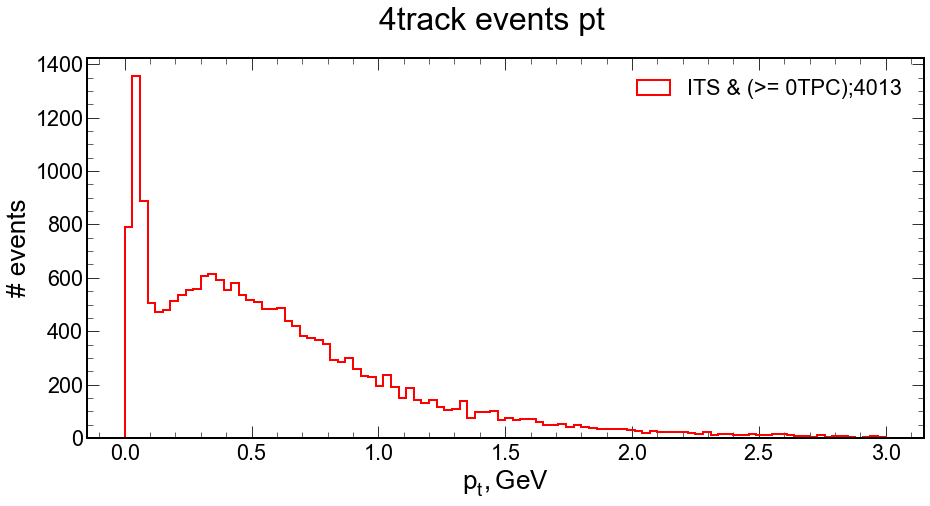

In [7]:
# TPCMask = (np.abs(dfs4Tracks.T_NumberOfSigmaTPCPion) < 3) & (dfs4Tracks.T_TPCNCls > 50) & (dfs4Tracks.T_TPCRefit == 1)

plt.style.use(hep.style.ROOT)
fig = plt.figure(figsize=(15,7))
# ax = fig.add_axes([0,0,1,1])
ax = fig.add_subplot()

fig.suptitle(f'4track events pt', fontsize=32)
tpcimpPt = []
colors = ['red','green', 'yellow', 'orange', 'black']
labels = ['ITS & (>= 0TPC)','ITS & (>= 1TPC)', 'ITS & (>= 2TPC)', 'ITS & (>= 3TPC)', 'ITS & (= 4TPC)']

i=0
ITSnTPCEvents = pd.unique(dfs4Tracks.reset_index().entry)
ITSnTPCTracks = dfs4Tracks.loc[ITSnTPCEvents]
tmpPt = np.sqrt(ITSnTPCTracks.groupby('entry').T_Px.sum()**2 + ITSnTPCTracks.groupby('entry').T_Py.sum()**2)
tpcimpPt.append(tmpPt)
ax.hist(tpcimpPt[i], bins=100, range=(0,3), histtype='step', color=colors[i], linewidth=2, label=labels[i]+f';{(tmpPt<0.15).sum()}')

ax.set_xlabel('$p_t, GeV$')
ax.set_ylabel('# events') 


ax.legend()

In [1]:
dfs4Tracks

NameError: name 'dfs4Tracks' is not defined